In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
# Calculate mean
mean_score = df['MathScore'].mean()

# Calculate median
median_score = df['MathScore'].median()

# Calculate mode
mode_scores = df['MathScore'].mode()
mode_score = mode_scores[0]  # In case of multiple modes, choose the first mode

# Print the results
print("Mean:", mean_score)
print("Median:", median_score)
print("Mode:", mode_score)

Mean: 66.5584021409223
Median: 67.0
Mode: 64


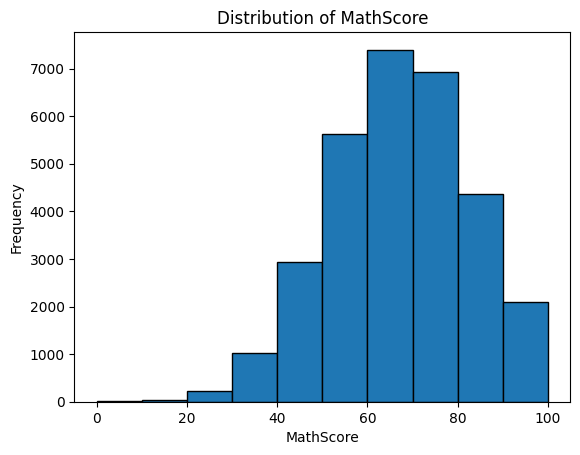

In [5]:
# Plot the distribution
plt.hist(df['MathScore'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('MathScore')
plt.ylabel('Frequency')
plt.title('Distribution of MathScore')

# Display the plot
plt.show()

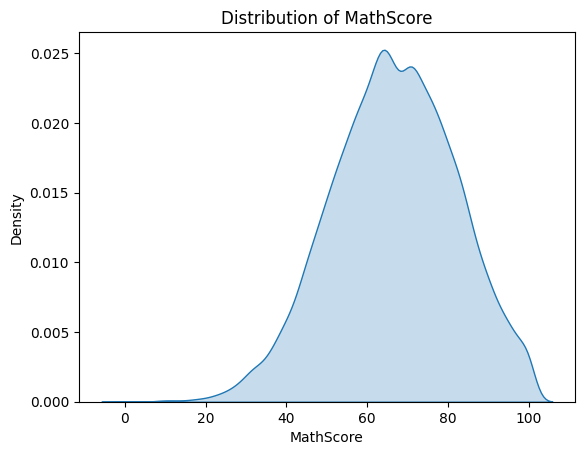

In [7]:
# Plot the distribution
sns.kdeplot(df['MathScore'], fill=True)

# Add labels and title
plt.xlabel('MathScore')
plt.ylabel('Density')
plt.title('Distribution of MathScore')

# Display the plot
plt.show()

In [8]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

df.Gender = lb.fit_transform(df.Gender)

In [9]:
df.LunchType = lb.fit_transform(df.LunchType)

In [10]:
df.dropna(subset=['IsFirstChild'], inplace=True)
df.IsFirstChild = lb.fit_transform(df.IsFirstChild)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.EthnicGroup = le.fit_transform(df.EthnicGroup)

In [12]:
mapping = {
    '< 5': 1,
    '5 - 10': 2,
    '> 10': 3,
    float('nan'): 2
}

df['WklyStudyHours'] = df['WklyStudyHours'].map(mapping)

mappingp = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6,
    "doctoral degree": 7,
    float('nan'): 3
}

df['ParentEduc'] = df['ParentEduc'].map(mappingp)

mapping = {
    "none": 1,
    "completed": 2,
    float('nan'): 1
}

df['TestPrep'] = df['TestPrep'].map(mapping)

In [13]:
parents = { 'single':1,
            'widowed':1, 
            'divorced':1,
            np.nan:1, 
            'married':2}

df['ParentMaritalStatus'] = df['ParentMaritalStatus'].map(parents)

In [14]:
sport = {'regularly':1,
         'sometimes':2,
         'never':3,
         np.nan:3}

df['PracticeSport'] = df['PracticeSport'].map(sport)
df['PracticeSport'] = df['PracticeSport'].astype(int)

In [15]:
df['NrSiblings'].fillna(0.0, inplace=True)
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [16]:
trans = {'private':2,
         'school_bus':1,
         np.nan:1}

df['TransportMeans'] = df['TransportMeans'].map(trans)

In [17]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,5,1,1,2,1,1,3,1,1,71,71,74
1,1,0,2,3,1,1,2,2,1,0,1,2,69,90,88
2,2,0,1,6,1,1,1,2,1,4,1,1,87,93,91
3,3,1,0,4,0,1,2,3,0,1,1,2,45,56,42
4,4,1,2,3,1,1,2,2,1,0,1,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,1,1,2,0,2,1,2,59,61,65
30637,890,1,4,2,1,1,1,1,0,1,2,2,58,53,51
30638,911,0,5,2,0,2,2,2,0,1,2,2,61,70,67
30639,934,0,3,4,1,2,2,1,0,3,1,2,82,90,93


In [18]:
df = df.drop(columns=['Unnamed: 0'])
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,5,5,1,1,2,1,1,3,1,1,71,71,74
1,0,2,3,1,1,2,2,1,0,1,2,69,90,88
2,0,1,6,1,1,1,2,1,4,1,1,87,93,91
3,1,0,4,0,1,2,3,0,1,1,2,45,56,42
4,1,2,3,1,1,2,2,1,0,1,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,2,1,1,1,2,0,2,1,2,59,61,65
30637,1,4,2,1,1,1,1,0,1,2,2,58,53,51
30638,0,5,2,0,2,2,2,0,1,2,2,61,70,67
30639,0,3,4,1,2,2,1,0,3,1,2,82,90,93


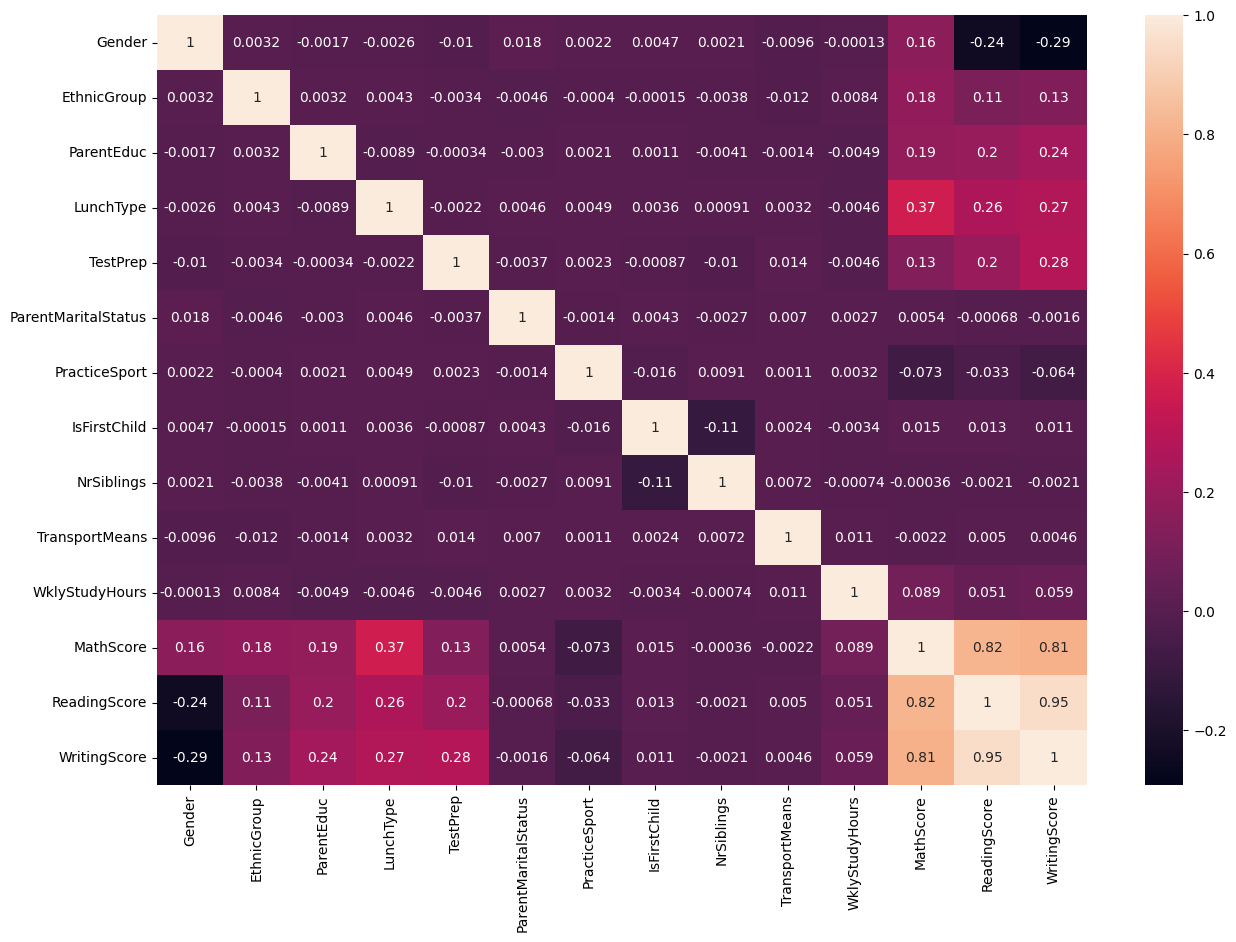

In [22]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

In [23]:
df2 = df.drop(columns=['ReadingScore', 'WritingScore'])
df2.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,0,5,5,1,1,2,1,1,3,1,1,71
1,0,2,3,1,1,2,2,1,0,1,2,69
2,0,1,6,1,1,1,2,1,4,1,1,87
3,1,0,4,0,1,2,3,0,1,1,2,45
4,1,2,3,1,1,2,2,1,0,1,2,76
5,0,1,4,1,1,2,1,1,1,1,2,73
6,0,1,3,1,2,1,3,0,1,2,2,85
7,1,1,3,0,1,2,2,1,1,2,3,41
8,1,3,2,0,2,1,2,0,3,2,3,65
9,0,1,2,0,1,2,1,1,0,2,1,37


In [25]:
df2['MathScore'] = df2['MathScore'].apply(lambda x: 1 if x >= 70 else 0)
df2.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,0,5,5,1,1,2,1,1,3,1,1,1
1,0,2,3,1,1,2,2,1,0,1,2,0
2,0,1,6,1,1,1,2,1,4,1,1,1
3,1,0,4,0,1,2,3,0,1,1,2,0
4,1,2,3,1,1,2,2,1,0,1,2,1
5,0,1,4,1,1,2,1,1,1,1,2,1
6,0,1,3,1,2,1,3,0,1,2,2,1
7,1,1,3,0,1,2,2,1,1,2,3,0
8,1,3,2,0,2,1,2,0,3,2,3,0
9,0,1,2,0,1,2,1,1,0,2,1,0


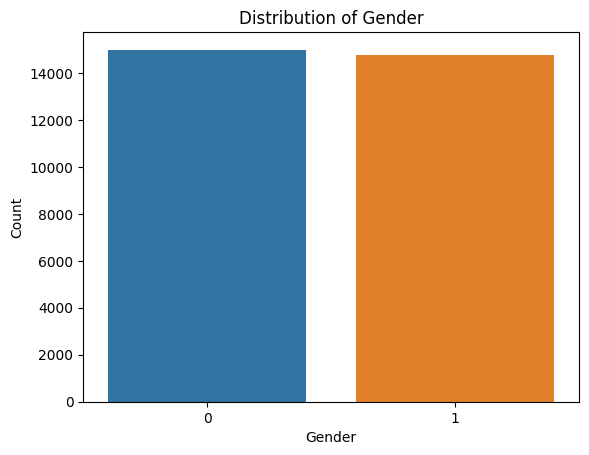

In [26]:
# Plot the histogram
sns.countplot(data=df2, x='Gender')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()

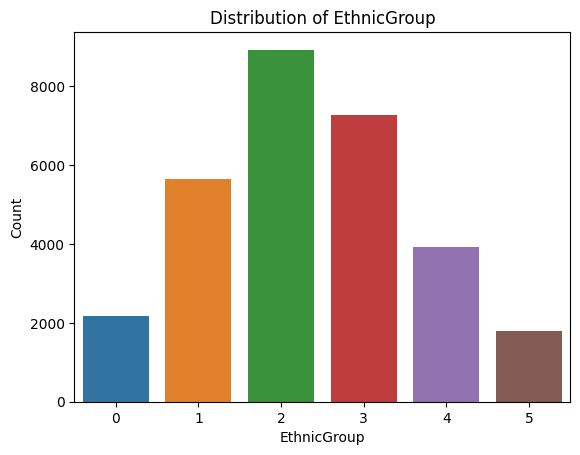

In [27]:
# Plot the histogram
sns.countplot(data=df2, x='EthnicGroup')

# Add labels and title
plt.xlabel('EthnicGroup')
plt.ylabel('Count')
plt.title('Distribution of EthnicGroup')

# Display the plot
plt.show()

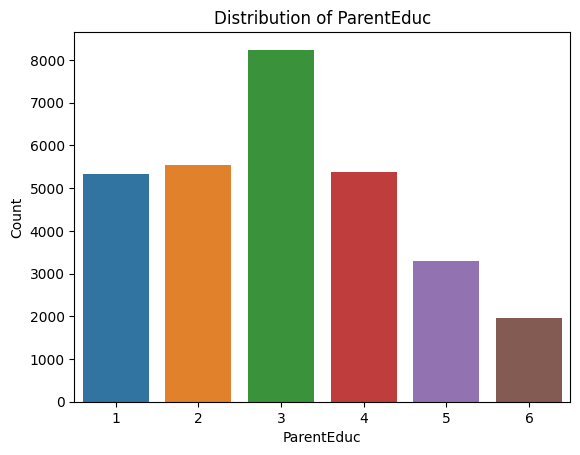

In [28]:
# Plot the histogram
sns.countplot(data=df2, x='ParentEduc')

# Add labels and title
plt.xlabel('ParentEduc')
plt.ylabel('Count')
plt.title('Distribution of ParentEduc')

# Display the plot
plt.show()

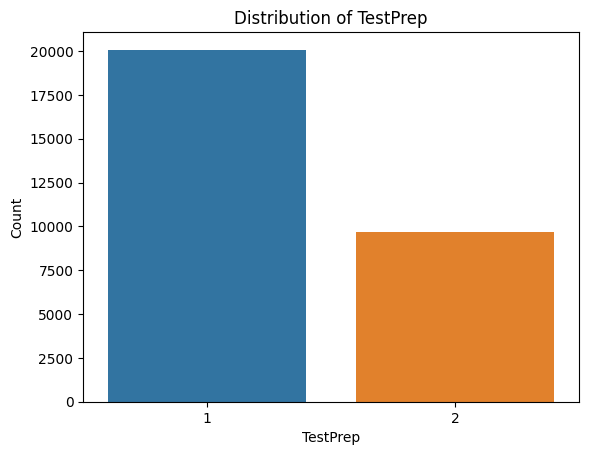

In [29]:
# Plot the histogram
sns.countplot(data=df2, x='TestPrep')

# Add labels and title
plt.xlabel('TestPrep')
plt.ylabel('Count')
plt.title('Distribution of TestPrep')

# Display the plot
plt.show()

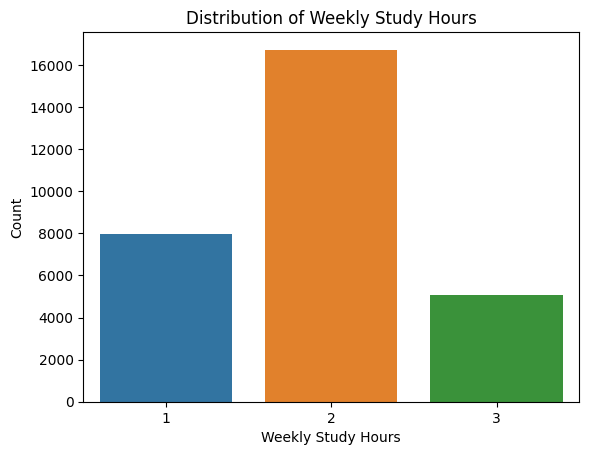

In [31]:
# Plot the histogram
sns.countplot(data=df2, x='WklyStudyHours')

# Add labels and title
plt.xlabel('Weekly Study Hours')
plt.ylabel('Count')
plt.title('Distribution of Weekly Study Hours')

# Display the plot
plt.show()


In [32]:
df2['MathScore'].value_counts()

0    16758
1    12979
Name: MathScore, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [34]:
X = df2.drop('MathScore', axis=1)
y = df2['MathScore']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

In [39]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('pca', PCA(n_components=11)),  # Preprocessing step: PCA
    ('model', LogisticRegression())  # Best model: LogisticRegression
])

# Fit the pipeline to the training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6682918628110289


In [40]:
# Get the predicted probabilities for the positive class from the pipeline
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print("AUC:", auc)

AUC: 0.7433148224073443


In [41]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6092671705553729


In [42]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.7028051554207733


In [43]:
from sklearn.metrics import confusion_matrix


In [44]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

[[2121 1189]
 [ 784 1854]]


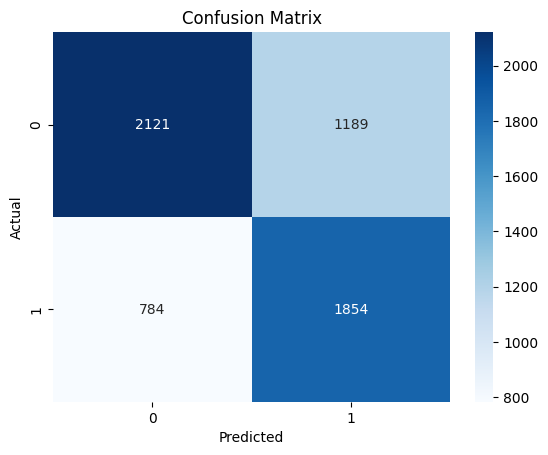

In [46]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show();